# Contents:
## 1. Classification and Regression Trees
## 2. The Bias-Variance Tradeoff
## 3. Bagging and Random Forests
## 4. Boosting
## 5. Model Tuning

In [1]:
import pandas as pd
import numpy as np

In [89]:
# Importing datasets
auto = pd.read_csv("https://assets.datacamp.com/production/repositories/1796/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv")
bikes = pd.read_csv("https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv")
wbc = pd.read_csv("https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv")
ilp = pd.read_csv('./Data/Indian Liver Patient Dataset (ILPD).csv')





# 1.Classification and Regression Trees

A classification tree divides the feature space into rectangular regions. In contrast, a linear model such as logistic regression produces only a single linear decision boundary dividing the feature space into two decision regions.

## 1.1 Building basic Decision Tree for classification

In [13]:
X_w = wbc[['radius_mean','concave points_mean']]
y_w = wbc['diagnosis'].values

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_w, y_w, test_size = 0.2, random_state=42)

In [17]:
## Training the model
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

['B' 'M' 'M' 'B' 'B']


In [21]:
## Evaluation
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.89


As we can see, Logistic regression has linear decision boundary. Decision trees have rectangular non linear boundaries.
<img src = './Images/DT-Co.png' width = 400 align = "left">

## 1.2 Classification tree learning
<img src = './Images/DT-Dt1.png' width = 400 align = "left">

<img src = './Images/DT-DT2.png ' width = 400 align = "left">

## 1.3 Changing the Information gain criterion
How do we change the criterion of information gain in the code? 
There are 2 types of criterion used for measuring information gain - entropy, gini_index

In [36]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Predicting 
y_pred = dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Predicting 
y_pred = dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

# Print accuracy_gini
print('Accuracy achieved by using the gini index: ', accuracy_gini)

print('\nNotice how the two models achieve exactly the same accuracy. \nMost of the time, the gini index and entropy lead to the same results. \nThe gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.')


Accuracy achieved by using entropy:  0.9035087719298246
Accuracy achieved by using the gini index:  0.9035087719298246

Notice how the two models achieve exactly the same accuracy. 
Most of the time, the gini index and entropy lead to the same results. 
The gini index is slightly faster to compute and is the default criterion used in the DecisionTreeClassifier model of scikit-learn.


## 1.4 Building basic Decision Tree for Regression

Decision trees can also be used for regression problems. Below you can see that there is clearly a non linear relation between the X and y variable. A normal linearr regression would do poorly in this case. However, we can see that a decision tree performs better.

<img src = './Images/DT-reg1.png' width = 500 height = 600 align = "left">

In [52]:
# Creating new Bool columns for categorical variables
df_region = pd.get_dummies(auto)

# Creating feature and target variable
X_a = df_region.drop('mpg',axis=1)
y_a = df_region['mpg'].values

In [54]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

X_train, X_test, y_train, y_test = train_test_split(X_a, y_a, test_size = 0.2, random_state=42)

# Instantiate dt
dt = DecisionTreeRegressor(max_depth=8,
             min_samples_leaf=0.13,
            random_state=3)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Compute y_pred
y_pred = dt.predict(X_test)

# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt ** (1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 4.82


In [55]:
## Comparing with Linear regression
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# fitting the model
reg.fit(X_train,y_train)

# Predict test set labels 
y_pred_lr = reg.predict(X_test)

# Compute mse_lr
mse_lr = MSE(y_test, y_pred_lr)

# Compute rmse_lr
rmse_lr = mse_lr ** (1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 4.30
Regression Tree test set RMSE: 4.82


# 2. The Bias-Variance Tradeoff

The end goal of a supervised learning problem is determining function f(x) and modeling function f^ which best predicts the original function f. We also want to discard noise as much as possible and achieve a low predictive error on unseen data.

<img src = './Images/DT-SL1.png' width = 300  align = "left">

There are usually 2 types of problems we encounter while achieving this:
1. Overfitting
2. Underrfitting

<img src = './Images/DT-SL2.png' width = 500 align = "left">

<img src = './Images/DT-SL3.png' width = 500 align = "left">

<img src = './Images/DT-SL4.png' width = 500 align = "left">

This below example is of a model that is undefitting. The model is not flexible enough to predict f(x)

<img src = './Images/DT-SL5.png' width = 500 align = "left">

Below is an example of a model that follows the taining points so closely it misses f(x). This leads to overfitting.


<img src = './Images/DT-SL6.png' width = 500 align = "left">

Below we can see that as model complexity increases, the variance increases and bias decreases and vice versa. Our goal is to create model that balances the 2.

<img src = './Images/DT-SL7.png' width = 500 align = "left">

<img src = './Images/DT-SL8.png' width = 800 align = "left">

In [63]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Set SEED for reproducibility
SEED = 1

# Split the data into 70% train and 30% test
X_train, X_test, y_train, y_test = train_test_split(X_a, y_a, test_size=0.3, random_state=SEED)

# Instantiate a DecisionTreeRegressor dt
dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.26, random_state=SEED)

# Compute the array containing the 10-folds CV MSEs
MSE_CV_scores = - cross_val_score(dt, X_train, y_train, cv=10, 
                       scoring='neg_mean_squared_error',
                       n_jobs=-1)

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))
#  A very good practice is to keep the test set untouched until you are confident about your model's performance. 
# CV is a great technique to get an estimate of a model's performance without affecting the test set

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(X_train)

# Evaluate the training set RMSE of dt
RMSE_train = (mean_squared_error(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.2f}'.format(RMSE_train))
print('Notice how the training error is roughly equal to the 10-folds CV error')



CV RMSE: 5.14
Train RMSE: 5.15
Notice how the training error is roughly equal to the 10-folds CV error


## 2.2 Ensemble learning

<img src = './Images/DT-CT1.png' width = 500 align = "left">

<img src = './Images/DT-EL1.png' width = 500 align = "left">

<img src = './Images/DT-EL2.png' width = 500 align = "left">

<img src = './Images/DT-EL3.png' width = 500 align = "left">

In [90]:
# Cleaning up the dataset for alignment with DataCamp
ilp.loc[ilp.gender == 'Male', 'gender'] = 1
ilp.loc[ilp.gender == 'Female', 'gender'] = 0
ilp.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [99]:
ilp_1 = ilp.copy()
ilp_1 = ilp_1.dropna()
X_i = ilp_1.drop('is_patient',axis=1)
y_i = ilp_1['is_patient']

In [103]:
### 2.2.1 Building Basic Ensemble learning model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Set seed for reproducibility
SEED=1

# Creating tarining and testing sets
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_i, y_i, test_size = 0.2, random_state=42)

# Instantiate lr
lr = LogisticRegression(random_state=SEED)

# Instantiate knn
knn = KNN(n_neighbors=27)

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=0.13, random_state=SEED)

# Define the list classifiers
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn), ('Classification Tree', dt)]

# Iterate over the pre-defined list of classifiers
for clf_name, clf in classifiers:    
  
    # Fit clf to the training set
    clf.fit(X_train, y_train)    
  
    # Predict y_pred
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
  
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))
    
# Instantiate a VotingClassifier vc
vc = VotingClassifier(estimators=classifiers)     

# Fit vc to the training set
vc.fit(X_train, y_train)   

# Evaluate the test set predictions
y_pred = vc.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print('Voting Classifier: {:.3f}'.format(accuracy))

# there are some discrepancies between this dataset and the one on datacamp.
# voting Classifier there performs better. 

Logistic Regression : 0.638
K Nearest Neighbours : 0.655
Classification Tree : 0.664
Voting Classifier: 0.638


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Bagging

In the earlier example, voting classifier trained different algorithms on same training set.
Bagging in training one algorithm on subsets of training sets. The algorithm itself can be any - Decision Tree, Logistic regression, Neural network.
Bagging is Bootstrap aggregation. This reduces variance.

Below is an example of bagging. Here, original set contains of 3 balls A,B,C. Boostrap sample is a sample drawn from this with replacement. In sample 1, B was drawn thrice. In sample 2, A was drawn twice and B once and so on.

<img src = './Images/DT-BG1.png' width = 500 align = "left">

While training different bootstrap samples are drawn and `n` models of same algorithm are trained on each of the samples.
<img src = './Images/DT-BG2.png' width = 500 align = "left">

When new sample is fed to the models, each model outputs it's prediction and the classifier then makes its own prediction depending on the nature of the problem. For Classification it is majority voting. For regression it is averaging the outputs.

<img src = './Images/DT-BG3.png' width = 500 align = "left">

## 3.1 Building Bagging classifier

In [105]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

# Instantiate dt
dt = DecisionTreeClassifier(random_state=1)

# Instantiate bc
# n_estimators is the number of classification trees that will be crerated under the hood.
bc = BaggingClassifier(base_estimator=dt, n_estimators=50, random_state=1)

# Fit bc to the training set
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate acc_test
acc_test = accuracy_score(y_test, y_pred)
print('Test set accuracy of bc: {:.2f}'.format(acc_test)) 

Test set accuracy of bc: 0.61


## 3.2 Out of bag Evaluation

In the previous example, on an average 63% of training instances are sampled while 37% constitute OOB instances i.e. Out of Bag. These OOBs can be used to evaluate model's performance without the need for CV.

In the below diagram, each model is trained on the training instances and evluated on the OOB samples. We get N scores and the OOB scoe is average of these scores.

only a subset of DTs is used for determining the OOB score.This leads to reducing the overall aggregation effect in bagging. Thus in general, validation on a full ensemble of DTs is better than a subset of DT for estimating the score. However, occasionally the dataset is not big enough and hence set aside a part of it for validation is unaffordable. Consequently, in cases where we do not have a large dataset and want to consume it all as the training dataset, the OOB score provides a good trade-off. Nonetheless, it should be noted that validation score and OOB score are unalike, computed in a different manner and should not be thus compared.

<img src = './Images/DT-OB1.png' width = 500 align = "left">

In [107]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Import BaggingClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score

# Instantiate dt
dt = DecisionTreeClassifier(min_samples_leaf=8, random_state=1)

# Instantiate bc
bc = BaggingClassifier(base_estimator=dt, 
            n_estimators=50,
            oob_score=True,
            random_state=1)

# Fit bc to the training set 
bc.fit(X_train, y_train)

# Predict test set labels
y_pred = bc.predict(X_test)

# Evaluate test set accuracy
acc_test = accuracy_score(y_test, y_pred)

# Evaluate OOB accuracy
acc_oob = bc.oob_score_

# Print acc_test and acc_oob
print('Test set accuracy: {:.3f}, OOB accuracy: {:.3f}'.format(acc_test, acc_oob))

# the whole point of OOB accuracy is to understand how the model will perform on unseen data without performing CV

Test set accuracy: 0.638, OOB accuracy: 0.717


## 3.3 Random Forest

- In Bagging, we train model on all feautres wth replacement. 
- In Random forest, we train the model with d features (d less than total features) without replacement. Also unlike bagging, the base estimator in Random forest is always decision tree. 
- Models are trained on d features and the nodes are split by features that maximize information gain. 
- d usually defaults to sqaure root of total features.
- Random forecast can be used for Classification and Regression.

<img src = './Images/DT-RF1.png' width = 500 align = "left"> 

<img src = './Images/DT-RF2.png' width = 500 align = "left"> 

In [109]:
X_b = bikes.drop('cnt',axis=1)
y_b = bikes['cnt']

In [121]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

# Creating tarining and testing sets
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size = 0.2, random_state=42)

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)
            
# Fit rf to the training set    
rf.fit(X_train, y_train) 



# Predict the test set labels
y_pred = rf.predict(X_test)

# Evaluate the test set RMSE
rmse_test = MSE(y_test,y_pred)**(1/2)

# Print rmse_test
print('Test set RMSE of rf: {:.2f}'.format(rmse_test))
# The MSE of RF is way lower than that of a single tree

Test set RMSE of rf: 57.66


### 3.3.2 Visualizing features importances

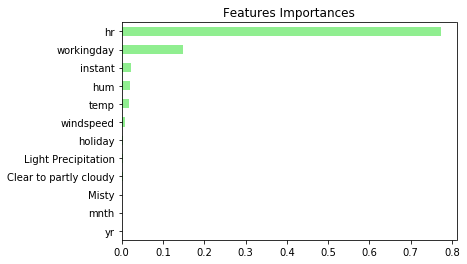

Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%!


In [125]:
import matplotlib.pyplot as plt
# Create a pd.Series of features importances
importances = pd.Series(data=rf.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()
print('Apparently, hr and workingday are the most important features according to rf. The importances of these two features add up to more than 90%!')


# 4. Boosting

- Ensemble method where many models trained and several weak learners are combined to form a strong learner in way where each learner learns from the errors of its predecessor.
- A weak learner is one which performs only slightly better than random guessing
- This usually involves training perdictors sequentially and each predictor tried to correct errors of predecessor.


## 4.1 Adaboost

<img src = './Images/DT-AB1.png' width = 500 align = "left">

The process flow for training the Adaboost is:
1. Predictor 1 is trained on dataset (X,y)
2. Error is computed
3. Error is used to compute alpha1, coeeficient of Predictor 1
4. alpha1 then decides the weights of training instances of Predictor2. Incorrectly trained instances are given more weight as shown in the figure. This means the predictor would have to pay special attention to these instances.
5. The above process is repeated sequentially till end.


<img src = './Images/DT-AB2.png' width = 500 align = "left">

We also have a learrning rate between 0,1.
Ideally, smaller the value of eeta (learning rate), higher the number of estimators.

<img src = './Images/DT-AB3.png' width = 500 align = "left">

In [127]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# Import AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
# Import roc_auc_score
from sklearn.metrics import roc_auc_score


# Creating tarining and testing sets
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_i, y_i, test_size = 0.2, random_state=42)

# Instantiate dt
dt = DecisionTreeClassifier(max_depth=2, random_state=1)

# Instantiate ada
# n_estimators is the number of trees
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=180, random_state=1)

# Fit ada to the training set
ada.fit(X_train,y_train)

# Compute the probabilities of obtaining the positive class
y_pred_proba = ada.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print roc_auc_score
print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.67


## 4.2 Gradient Boosting (GB)

1. GB, too is sequantial in nature but previous errors do not tweak training instances.
2. Each predictor is trained using its predecessor's residual errors as label
3. In the fig below, predictor is trained and error yhat gives r1, residual for predictor1
4. This residual is used in predictor 2 giving r2 and so on.

<img src = './Images/DT-GB1.png' width = 500 align = "left">

In [129]:
# Import RandomForestRegressor
from sklearn.model_selection import train_test_split
# Import mean_squared_error as MSE
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

# Creating tarining and testing sets
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size = 0.2, random_state=42)

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, 
            n_estimators=200,
            random_state=2)

# Fit gb to the training set
gb.fit(X_train,y_train)

# Predict test set labels
y_pred = gb.predict(X_test)


# Compute MSE
mse_test = mean_squared_error(y_test,y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))

Test set RMSE of gb: 51.359


## 4.3 Stochastic Gradient Boosting (SGB)

1. GB has some cons. In GB, each CART is trained to find the best split points and features. This could lead to CARTs using the same split points and same features
2. Stochastic Gradient Boosting is used to mitigate the above cons. In SGB, each tree is trained on a random subset of rows.
3. Instances are sampled without replacement. Features, too are sampled without replacement. This increases the diversity and adds further variance to the tree ensemble.

- In the below diagram:
1. Instances are randomly sampled without replacement.
2. This sampled data is considered fo training. 
3. Not all features are considered for training.
4. The tree is then trained and the residual errors are computed.
5. The residual error is multiplied by the learning rate and is fed to the next tree in the ensemble.

<img src = './Images/DT-SGB1.png' width = 700 align = "left">

In [131]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as MSE

# Instantiate sgbr
# n_estimators is number of decision stumps. A stump is a one-level decision tree. Notice max_depth = 1
# subsample is used to sample 90% of data for training
# max_features means each tree uses 75% of available features
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200,                                
            random_state=2)

# Fit sgbr to the training set
sgbr.fit(X_train,y_train)

# Predict test set labels
y_pred = sgbr.predict(X_test)

# Compute test set MSE
mse_test = MSE(y_test,y_pred)

# Compute test set RMSE
rmse_test = mse_test ** (1/2)

# Print rmse_test
print('Test set RMSE of sgbr: {:.3f}'.format(rmse_test))

print('The stochastic gradient boosting regressor achieves a lower test set RMSE than the gradient boosting regressor')



Test set RMSE of sgbr: 52.738
The stochastic gradient boosting regressor achieves a lower test set RMSE than the gradient boosting regressor


# 5. Model Tuning

- We need to tune hyperparameters for optimal model which will give us the optimal score, may it be accurracy (Classification) or Rsquare (Regression).
- Cross Validation is used to generalize model performance.
- There are multiple ways of tuning hyper params - GridSearch, Random Search, Bayesian Optimization and Genetic Algorithms. 


In [133]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
# Import roc_auc_score from sklearn.metrics
from sklearn.metrics import roc_auc_score

# Creating tarining and testing sets
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_i, y_i, test_size = 0.2, random_state=42)

# You can get a list of available hyperrparams by  - dt.get_params

# Define params_dt
params_dt = {'max_depth': [2,3,4],
'min_samples_leaf' : [0.12,0.14,0.16,0.18]}

# Instantiate grid_dt
grid_dt = GridSearchCV(estimator=dt,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# fitting the object
grid_dt.fit(X_train, y_train)

# Extract the best estimator
best_model = grid_dt.best_estimator_

# Predict the test set probabilities of the positive class
y_pred_proba = grid_dt.predict_proba(X_test)[:,1]

# Compute test_roc_auc
test_roc_auc = roc_auc_score(y_test,y_pred_proba)

# Print test_roc_auc
print('Test set ROC AUC score: {:.3f}'.format(test_roc_auc))

Test set ROC AUC score: 0.677


/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## 5.2 Tuning Hyper params for Random Forest

In [136]:
# Lets get a list of hyperparams available for tuning
from sklearn.ensemble import RandomForestRegressor

# Instantiate rf
rf = RandomForestRegressor(n_estimators=25,
            random_state=2)

print(rf.get_params)

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=None,
           oob_score=False, random_state=2, verbose=0, warm_start=False)>


In [137]:
# Import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE

# Creating tarining and testing sets
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, test_size = 0.2, random_state=42)

# Define the dictionary 'params_rf'
params_rf = {
    'n_estimators': [100,350,500],
    'max_features': ['log2', 'auto', 'sqrt'],
    'min_samples_leaf': [2, 10, 30]
}

# Instantiate grid_rf
grid_rf = GridSearchCV(estimator=rf,
                       param_grid=params_rf,
                       scoring='neg_mean_squared_error',
                       cv=3,
                       verbose=1,
                       n_jobs=-1)
# fit the model
grid_rf.fit(X_train,y_train)

# Extract the best estimator
best_model = grid_rf.best_estimator_

# Predict test set labels
y_pred = best_model.predict(X_test)

# Compute rmse_test
rmse_test = MSE(y_test,y_pred)**(1/2)

# Print rmse_test
print('Test RMSE of best model: {:.3f}'.format(rmse_test)) 

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:    7.5s finished
/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Test RMSE of best model: 59.908
